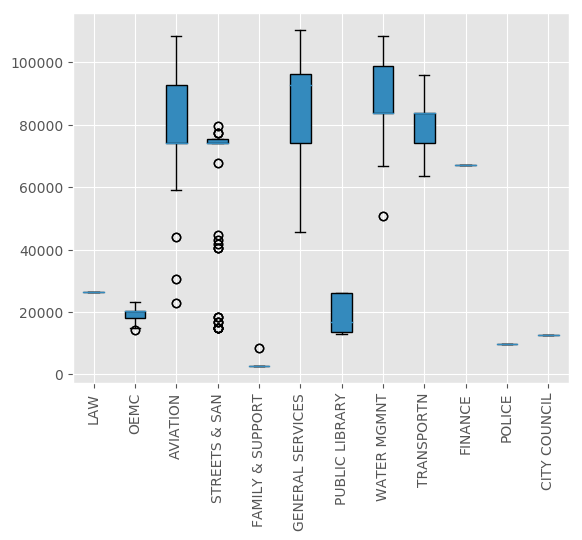

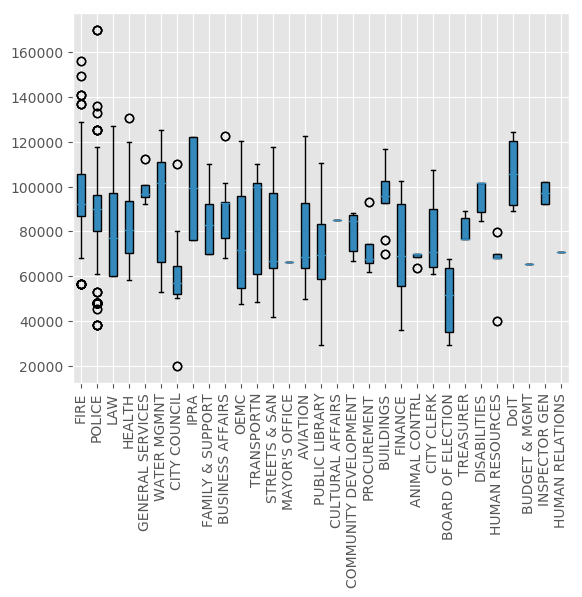

In [161]:
import requests
import json
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

def salary_call():
    # salary API endpoint
    salaried_url = "http://127.0.0.1:5000/salaried"

    headers = {
        'cache-control': "no-cache",
        'postman-token': "b3d5403f-6ebf-f127-a9ee-0e1bfd0a45ba"
        }

    response = requests.request("GET", salaried_url, headers=headers)

    # data from the API calls
    parse = json.loads(response.text)
    pretty = json.dumps(parse, indent=4, separators=(',', ': '))

    # list of all the data points, each data point is a tuple
    # myList- tuple consists of: (title_department, salary)
    # anotherList- tuple consists of: (title, department, salary)
    myList = []
    anotherList = []

     # parse through data and take the following fields: job title, department, and annual salary
    for i in range(0,len(parse["_items"])):
        
        title = parse["_items"][i]["job_titles"]
        department = parse["_items"][i]["department"]
        salary = parse["_items"][i]["annual_salary"]

        title_department = title + "_" + department
        
        # info_tup = (title_department, salary)
        # info_tup_seperate = (title, department, salary)
        info_tup = (department, float(salary))
        
        myList.append(info_tup)
        # anotherList.append(info_tup_seperate)
        
    return(myList)
    
def hourly_call():
    # hourly API endpoint
    hourly_url = "http://127.0.0.1:5000/hourly"

    headers = {
        'cache-control': "no-cache",
        'postman-token': "b3d5403f-6ebf-f127-a9ee-0e1bfd0a45ba"
        }

    response = requests.request("GET", hourly_url, headers=headers)

    # data from the API calls
    parse = json.loads(response.text)
    pretty = json.dumps(parse, indent=4, separators=(',', ': '))

    # list of all the data points, each data point is a tuple
    # myList- tuple consists of: (title_department, approx_annual_salary)
    # anotherList- tuple consists of: (title, department, approx_annual_salary)
    myList = []
    anotherList = []

    # parse through data and take the following fields: job title, department, and typical hours
    for i in range(0,len(parse["_items"])):
        title = parse["_items"][i]["job_titles"]
        department = parse["_items"][i]["department"]
        approx_hours = parse["_items"][i]["typical_hours"]
        rate = parse["_items"][i]["hourly_rate"]
        
        title_department = title + "_" + department
        # assumed two weeks off for vacation
        approx_annual_salary = '{:.2f}'.format((int(approx_hours)*float(rate))*int(52))

        # info_tup = (title_department, approx_annual_salary)
        # info_tup_seperate = (title, department, approx_annual_salary)
        info_tup = (department, float(approx_annual_salary))
        
        myList.append(info_tup)
        # anotherList.append(info_tup_seperate)

    return(myList)
    
def computations(hourly_list, salary_list):
    hourly_info = hourly_list
    salary_info = salary_list
    
    dict_hourly = dict(hourly_info)
    dict_salary = dict(salary_info)
    
    total_hourly = []
    total_salary = []
    
    for i in dict_hourly.keys():
        department_name = i
        total_sal = 0
        counter = 0
        
        for (department, salary) in hourly_info:
            if department == i:
                total_sal += salary
                counter += 1
                
        total_sal_formatted = '{:.2f}'.format(total_sal)
        total_hourly.append((department_name, float(total_sal_formatted), counter))

    for i in dict_salary.keys():
        department_name = i
        total_sal = 0
        counter = 0
        
        for (department, salary) in salary_info:
            if department == i:
                total_sal += salary
                counter += 1
                
        total_sal_formatted = '{:.2f}'.format(total_sal)
        total_salary.append((department_name, float(total_sal_formatted), counter))
    
    hourly_avg = []
    salary_avg = []
    
    for (department, total_sal, count) in total_hourly:
        computed_avg = total_sal / count
        
        computed_avg_formatted = '{:.2f}'.format(computed_avg)
        hourly_avg.append((department, float(computed_avg_formatted)))
        
    for (department, total_sal, count) in total_salary:
        computed_avg = total_sal / count
        
        computed_avg_formatted = '{:.2f}'.format(computed_avg)
        salary_avg.append((department, float(computed_avg_formatted)))
        
    return(total_hourly, total_salary, hourly_avg, salary_avg)
    
def bar_plot(hourly_avg_list, salary_avg_list):
    hourly_list = hourly_avg_list
    salary_list = salary_avg_list
    bar_width = 0.8
    opacity = 0.8
    
    department_names_hourly = [i[0] for i in hourly_list]
    hourly_salary = [i[1] for i in hourly_list]
    department_names_salary = [i[0] for i in salary_list]
    salaried_salary = [i[1] for i in salary_list]
    
    h_index = np.arange(len(hourly_list))
    s_index = np.arange(len(salary_list))
    
    rects1 = plt.bar(h_index, hourly_salary, bar_width, alpha = opacity, color = '#A64253', label = "Hourly")
    plt.xticks(h_index, department_names_hourly, rotation = 90)
    plt.ylabel('Salary')
    plt.title('Average Yearly Salary for Hourly Employees per Department ')
    plt.show()   
    
    rects2 = plt.bar(s_index, salaried_salary, bar_width, alpha = opacity, color = '#7BB2C6', label = "Salaried")
    plt.xticks(s_index, department_names_salary, rotation = 90)
    plt.ylabel('Salary')
    plt.title('Average Yearly Salary for Salaried Employees per Department ')
    plt.show()
    
def histo_plot(hourly_data, salary_data):
    hourly_list = hourly_data
    salary_list = salary_data

    return None
        
def box_plot(hourly_list, salary_list):
    hourly_info = hourly_list
    salary_info = salary_list
    
    dict_hourly = dict(hourly_info)
    dict_salary = dict(salary_info)
    
    hourly_collection = []
    hourly_department_names = []
    salary_collection = []
    salary_department_names = []
    
    for i in dict_hourly.keys():
        salary_list = []
        hourly_department_names.append(i)
        
        for (department, salary) in hourly_info:
            if department == i:
                salary_list.append(salary)
                
        hourly_collection.append(salary_list)
        
    for i in dict_salary.keys():
        salary_list = []
        salary_department_names.append(i)
        
        for (department, salary) in salary_info:
            if department == i:
                salary_list.append(salary)
                
        salary_collection.append(salary_list)
                
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    bp = ax1.boxplot(hourly_collection, patch_artist= True)
    ax1.set_xticklabels(hourly_department_names, rotation = 90)
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    bp = ax2.boxplot(salary_collection, patch_artist= True)
    ax2.set_xticklabels(salary_department_names, rotation = 90)
    
    plt.show()
    
if __name__ == "__main__":
    hourly_data = hourly_call()
    salary_data = salary_call()
    
    (alpha, beta, gamma, delta) = computations(hourly_data, salary_data)
    
    #bar_plot(gamma, delta)
    #histo_plot(alpha, beta)
    box_plot(hourly_data, salary_data)